In [1]:
import os, sys

import re


import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Test run of calculating Gini index

In [2]:
filePath = '/Users/huiyu818/Project/TCR/ABchainCom/'

In [3]:
sampleList = os.listdir(filePath)

In [4]:
sampleList

['P876_118_ab.txt',
 'P1168_105_ab.txt',
 'P1121_142_ab.txt',
 'P829_110_ab.txt',
 'P876_106_ab.txt',
 'P1254_105_ab.txt',
 'P1121_121_ab.txt',
 'P1168_117_ab.txt',
 'P829_102_ab.txt',
 'P1168_109_ab.txt',
 'P876_114_ab.txt',
 'P1121_133_ab.txt',
 'P1254_117_ab.txt',
 'P1168_121_ab.txt',
 'P1254_142_ab.txt',
 'P876_141_ab.txt',
 'P876_122_ab.txt',
 'P829_134_ab.txt',
 'P1121_105_ab.txt',
 'P1254_121_ab.txt',
 'P1168_142_ab.txt',
 'P1254_150_ab.txt',
 'P1168_133_ab.txt',
 'P829_138_ab.txt',
 'P1121_109_ab.txt',
 'P876_130_ab.txt',
 'P829_126_ab.txt',
 'P1254_133_ab.txt',
 'P1121_117_ab.txt',
 'P876_116_ab.txt',
 'P1121_131_ab.txt',
 'P1254_115_ab.txt',
 'P1168_115_ab.txt',
 'P876_108_ab.txt',
 'P876_104_ab.txt',
 'P829_112_ab.txt',
 'P1168_119_ab.txt',
 'P1254_107_ab.txt',
 'P1121_123_ab.txt',
 'P1168_107_ab.txt',
 'P1121_140_ab.txt',
 'P1254_119_ab.txt',
 'P829_124_ab.txt',
 'P876_132_ab.txt',
 'P1254_131_ab.txt',
 'P1121_115_ab.txt',
 'P1254_152_ab.txt',
 'P1168_131_ab.txt',
 'P829_13

In [5]:
pid = sampleList[0][:-7]
pid

'P876_118'

In [6]:
fileP = filePath + sampleList[0]
cloneT = pd.read_csv(fileP, sep='\t')

In [7]:
cloneT

,cloneId,cloneCount,cloneFraction,bestVGene,bestDGene,bestJGene,bestCGene,bestVAlignment,bestJAlignment,numberOfTargets,nSeqCDR3,fractionNew
0,1091,71.0,0.307359,TRBV20-1,TRBD1,TRBJ2-1,TRBC2,421|430|455|0|9||45.0,27|42|70|30|45||75.0,1,TGCAGTGCTCCTACCGGACAGGGGTTTGATAATGAGCAGTTCTTC,0.191892
1,2883,25.0,0.179856,TRAV20,NaN,TRAJ40,TRAC,424|435|457|0|11||55.0,21|50|81|13|42||145.0,1,TGTGCTGTGCACTCTACCTCAGGAACCTACAAATACATCTTT,0.067568
2,4096,16.0,0.069264,TRBV21-1,TRBD1,TRBJ1-3,TRBC1,431|441|468|0|10||50.0,24|42|70|25|43||90.0,1,TGTGCCAGCACGCTTCGGGGGGGACGGAAACACCATATATTTT,0.043243
3,7512,7.0,0.030303,TRBV6-1,TRBD1,TRBJ1-1,TRBC1,427|445|464|0|18||90.0,23|40|68|28|45||85.0,1,TGTGCCAGCAGTGAAGCGTTGGGGGGCTACACTGAAGCTTTCTTT,0.018919
4,11025,4.0,0.028777,TRDV2,TRDD3,TRDJ1,TRDC,430|446|465|0|16||80.0,20|40|71|25|45||100.0,1,TGTGCCTGTGACACCGTCGGGGGAGACACCGATAAACTCATCTTT,0.010811
...,...,...,...,...,...,...,...,...,...,...,...,...
206,24771,1.0,0.004329,TRBV29-1,TRBD2,TRBJ2-1,TRBC2,421|428|455|0|7||35.0,29|42|70|23|36||65.0,1,TGCAGCGCCCGGGAGGGGGTAGGTGAGCAGTTCTTC,0.002703
207,26009,1.0,0.007194,TRAV1-2,NaN,TRAJ31,TRAC,412|420|446|0|8||40.0,23|46|77|10|33||115.0,1,TGTGCTGTTCATAACAATGCCAGACTCATGTTT,0.002703
208,26015,1.0,0.004329,TRBV10-3,NaN,TRBJ2-3,TRBC2,427|441|464|0|14||70.0,26|41|69|18|33||75.0,1,TGTGCCATCAGTGAATTGGATACGCAGTATTTT,0.002703
209,26024,1.0,0.007194,TRAV6,NaN,TRAJ18,NaN,427|432|460|0|5||25.0,30|55|86|8|33||125.0,1,TGTGCGCCCTCAACCCTGGGGAGGCTATACTTT,0.002703


In [8]:
patientList = []
for i in sampleList:
    patientList.append(i[:-7])
    

In [9]:
patientList

['P876_118',
 'P1168_105',
 'P1121_142',
 'P829_110',
 'P876_106',
 'P1254_105',
 'P1121_121',
 'P1168_117',
 'P829_102',
 'P1168_109',
 'P876_114',
 'P1121_133',
 'P1254_117',
 'P1168_121',
 'P1254_142',
 'P876_141',
 'P876_122',
 'P829_134',
 'P1121_105',
 'P1254_121',
 'P1168_142',
 'P1254_150',
 'P1168_133',
 'P829_138',
 'P1121_109',
 'P876_130',
 'P829_126',
 'P1254_133',
 'P1121_117',
 'P876_116',
 'P1121_131',
 'P1254_115',
 'P1168_115',
 'P876_108',
 'P876_104',
 'P829_112',
 'P1168_119',
 'P1254_107',
 'P1121_123',
 'P1168_107',
 'P1121_140',
 'P1254_119',
 'P829_124',
 'P876_132',
 'P1254_131',
 'P1121_115',
 'P1254_152',
 'P1168_131',
 'P829_136',
 'P876_120',
 'P1121_107',
 'P1254_123',
 'P1168_140',
 'P1168_123',
 'P829_128',
 'P1254_140',
 'P1121_119',
 'P1121_103',
 'P1254_127',
 'P1168_144',
 'P1168_139',
 'P829_132',
 'P876_124',
 'P1254_139',
 'P1168_127',
 'P1254_144',
 'P1254_135',
 'P1121_111',
 'P829_120',
 'P1254_148',
 'P876_136',
 'P876_128',
 'P1168_135',
 'P

In [10]:
len(patientList)

228

In [11]:
filePath

'/Users/huiyu818/Project/TCR/ABchainCom/'

## calculating gini index

In [12]:
def gini_cal(fractions):
    
    n = float(fractions.size)
    
    cum_fractions = np.cumsum(sorted(np.append(fractions, 0)))
    
    sum_fractions = cum_fractions[-1]
    
    giniCoef = 1 - 2*(float(np.sum(cum_fractions) - sum_fractions/2)/sum_fractions/n)
    
    return format(giniCoef, '.5f')

In [13]:
cloneFra = cloneT['cloneCount'].values
cloneFra

array([71., 25., 16.,  7.,  4.,  3.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [14]:
len(cloneFra)

211

In [15]:
giniIndex = gini_cal(cloneFra)
giniIndex

'0.40389'

In [16]:
tcrAB_gini = {}

for sid in sampleList:
    pid = sid[:-7]
    
    clonePath = filePath + sid
    cloneT = pd.read_csv(clonePath, sep='\t')
    
    cloneFra = cloneT['cloneCount'].values
    giniIndex = gini_cal(cloneFra)
    
    tcrAB_gini[pid] = giniIndex
    
    print('The gini index of {} is {}'.format(pid, giniIndex))
    
    


The gini index of P876_118 is 0.40389
The gini index of P1168_105 is 0.35367
The gini index of P1121_142 is 0.20196
The gini index of P829_110 is 0.13062
The gini index of P876_106 is 0.13536
The gini index of P1254_105 is 0.25060
The gini index of P1121_121 is 0.13378
The gini index of P1168_117 is 0.34252
The gini index of P829_102 is 0.23796
The gini index of P1168_109 is 0.36827
The gini index of P876_114 is 0.26422
The gini index of P1121_133 is 0.15787
The gini index of P1254_117 is 0.31613
The gini index of P1168_121 is 0.12863
The gini index of P1254_142 is 0.39714
The gini index of P876_141 is 0.25994
The gini index of P876_122 is 0.30522
The gini index of P829_134 is 0.20754
The gini index of P1121_105 is 0.18663
The gini index of P1254_121 is 0.21845
The gini index of P1168_142 is 0.18314
The gini index of P1254_150 is 0.23029
The gini index of P1168_133 is 0.34680
The gini index of P829_138 is 0.36249
The gini index of P1121_109 is 0.36310
The gini index of P876_130 is 0.37

In [17]:
tcrAB_gini

{'P876_118': '0.40389',
 'P1168_105': '0.35367',
 'P1121_142': '0.20196',
 'P829_110': '0.13062',
 'P876_106': '0.13536',
 'P1254_105': '0.25060',
 'P1121_121': '0.13378',
 'P1168_117': '0.34252',
 'P829_102': '0.23796',
 'P1168_109': '0.36827',
 'P876_114': '0.26422',
 'P1121_133': '0.15787',
 'P1254_117': '0.31613',
 'P1168_121': '0.12863',
 'P1254_142': '0.39714',
 'P876_141': '0.25994',
 'P876_122': '0.30522',
 'P829_134': '0.20754',
 'P1121_105': '0.18663',
 'P1254_121': '0.21845',
 'P1168_142': '0.18314',
 'P1254_150': '0.23029',
 'P1168_133': '0.34680',
 'P829_138': '0.36249',
 'P1121_109': '0.36310',
 'P876_130': '0.37187',
 'P829_126': '0.29427',
 'P1254_133': '0.41928',
 'P1121_117': '0.26253',
 'P876_116': '0.26736',
 'P1121_131': '0.28295',
 'P1254_115': '0.48822',
 'P1168_115': '0.12772',
 'P876_108': '0.44662',
 'P876_104': '0.07598',
 'P829_112': '0.38030',
 'P1168_119': '0.20308',
 'P1254_107': '0.32005',
 'P1121_123': '0.15474',
 'P1168_107': '0.28943',
 'P1121_140': '

In [ ]:
/Users/huiyu818/Project/TCR/ABchainAna

In [18]:
len(tcrAB_gini)

228

In [19]:
tcrAB_gini_series = pd.Series(tcrAB_gini)
tcrAB_gini_series.rename_axis('giniIndex')

giniIndex
P876_118     0.40389
P1168_105    0.35367
P1121_142    0.20196
P829_110     0.13062
P876_106     0.13536
              ...   
P1254_124    0.35998
P1168_147    0.25662
P1168_124    0.14360
P1254_147    0.38358
P876_139     0.31099
Length: 228, dtype: object

In [20]:
tcrAB_gini_series.to_csv('/Users/huiyu818/Project/TCR/ABchainAna/tcrAB_gini.csv', sep='\t',index_label='SampID')
tcrAB_gini_series.to_excel('/Users/huiyu818/Project/TCR/ABchainAna/tcrAB.xlsx',index_label='SampID')

In [27]:
tcrT = pd.DataFrame(tcrAB_gini_series)
tcrT

,0
P876_118,0.40389
P1168_105,0.35367
P1121_142,0.20196
P829_110,0.13062
P876_106,0.13536
...,...
P1254_124,0.35998
P1168_147,0.25662
P1168_124,0.14360
P1254_147,0.38358


In [28]:
tcrT.reset_index(inplace=True)

In [29]:
tcrT

,index,0
0,P876_118,0.40389
1,P1168_105,0.35367
2,P1121_142,0.20196
3,P829_110,0.13062
4,P876_106,0.13536
...,...,...
223,P1254_124,0.35998
224,P1168_147,0.25662
225,P1168_124,0.14360
226,P1254_147,0.38358


In [32]:
tcrT.rename(columns={0:'AB_Gini'}, inplace=True)
tcrT

,index,AB_Gini
0,P876_118,0.40389
1,P1168_105,0.35367
2,P1121_142,0.20196
3,P829_110,0.13062
4,P876_106,0.13536
...,...,...
223,P1254_124,0.35998
224,P1168_147,0.25662
225,P1168_124,0.14360
226,P1254_147,0.38358


In [33]:
tcrT.rename(columns={'index':'SampID'}, inplace=True)
tcrT

,SampID,AB_Gini
0,P876_118,0.40389
1,P1168_105,0.35367
2,P1121_142,0.20196
3,P829_110,0.13062
4,P876_106,0.13536
...,...,...
223,P1254_124,0.35998
224,P1168_147,0.25662
225,P1168_124,0.14360
226,P1254_147,0.38358


In [34]:
tcrAllchainT = pd.read_excel('/Users/huiyu818/Project/TCR/ABchainAna/tcrAB.xlsx', sheet_name='All_Gini')
tcrAllchainT

,SampID,ID,All_Gini
0,P829_125,L400T,0.22658
1,P829_107,L401T,0.24288
2,P829_114,L404T,0.38827
3,P829_130,L406T,0.26736
4,P876_101,L413T,0.11635
...,...,...,...
222,P1254_147,L884T,0.37548
223,P1254_149,L885T,0.21683
224,P829_103,L886T,0.17236
225,P876_126,L887T,0.64564


In [38]:
tcrT = tcrT.merge(tcrAllchainT, on='SampID', how='inner')

In [39]:
tcrT

,SampID,AB_Gini,ID,All_Gini
0,P876_118,0.40389,L529T,0.39707
1,P1168_105,0.35367,L644T,0.35247
2,P1121_142,0.20196,L628T,0.19878
3,P829_110,0.13062,L439T,0.12703
4,P876_106,0.13536,L483T,0.13815
...,...,...,...,...
222,P1254_124,0.35998,L880T,0.36259
223,P1168_147,0.25662,L781T E,0.25482
224,P1168_124,0.14360,L655T,0.14512
225,P1254_147,0.38358,L884T,0.37548


In [43]:
tcrT = tcrT.astype({'All_Gini':'float64'})
tcrT = tcrT.astype({'AB_Gini':'float64'})

In [59]:
sns.color_palette()

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [64]:
import colorbm as cbm

In [66]:
cbm.pal('npg').show()

AttributeError: 'pal' object has no attribute 'show'

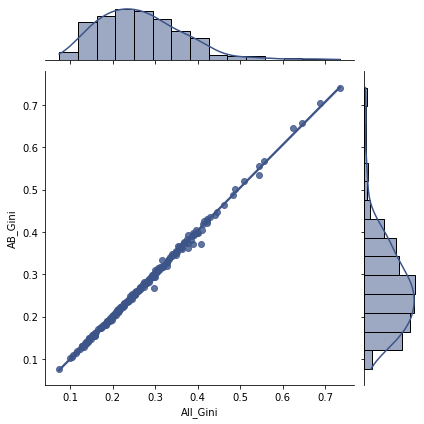

In [70]:
tcr_AB_All = sns.jointplot(x='All_Gini', y='AB_Gini', data=tcrT, kind='reg', color='#3C5488FF')

In [71]:
tcr_AB_All.savefig('/Users/huiyu818/Project/TCR/ABchainAna/tcr_AB_All.eps', dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [46]:
tcrT[['All_Gini', 'AB_Gini']].corr('spearman')

,All_Gini,AB_Gini
All_Gini,1.000000,0.998889
AB_Gini,0.998889,1.000000


In [48]:
tcr_AB_All.savefig('/Users/huiyu818/Project/TCR/ABchainAna/tcr_AB_All.eps', dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [51]:
pwd

'/Users/huiyu818/Project/TCR/Code'

In [72]:
tcrT

,SampID,AB_Gini,ID,All_Gini
0,P876_118,0.40389,L529T,0.39707
1,P1168_105,0.35367,L644T,0.35247
2,P1121_142,0.20196,L628T,0.19878
3,P829_110,0.13062,L439T,0.12703
4,P876_106,0.13536,L483T,0.13815
...,...,...,...,...
222,P1254_124,0.35998,L880T,0.36259
223,P1168_147,0.25662,L781T E,0.25482
224,P1168_124,0.14360,L655T,0.14512
225,P1254_147,0.38358,L884T,0.37548


In [74]:
len(tcrAB_gini)

228

In [77]:
tcrAB_pid = set(tcrAB_gini.keys())

In [78]:
tcrAB_pid

{'P1121_101',
 'P1121_102',
 'P1121_103',
 'P1121_104',
 'P1121_105',
 'P1121_106',
 'P1121_107',
 'P1121_108',
 'P1121_109',
 'P1121_110',
 'P1121_111',
 'P1121_112',
 'P1121_113',
 'P1121_114',
 'P1121_115',
 'P1121_116',
 'P1121_117',
 'P1121_118',
 'P1121_119',
 'P1121_120',
 'P1121_121',
 'P1121_122',
 'P1121_123',
 'P1121_124',
 'P1121_125',
 'P1121_126',
 'P1121_127',
 'P1121_128',
 'P1121_129',
 'P1121_130',
 'P1121_131',
 'P1121_132',
 'P1121_133',
 'P1121_134',
 'P1121_135',
 'P1121_136',
 'P1121_137',
 'P1121_138',
 'P1121_139',
 'P1121_140',
 'P1121_141',
 'P1121_142',
 'P1121_143',
 'P1121_144',
 'P1121_145',
 'P1121_146',
 'P1121_147',
 'P1168_101',
 'P1168_102',
 'P1168_103',
 'P1168_104',
 'P1168_105',
 'P1168_106',
 'P1168_107',
 'P1168_108',
 'P1168_109',
 'P1168_110',
 'P1168_111',
 'P1168_112',
 'P1168_113',
 'P1168_114',
 'P1168_115',
 'P1168_116',
 'P1168_117',
 'P1168_118',
 'P1168_119',
 'P1168_120',
 'P1168_121',
 'P1168_122',
 'P1168_123',
 'P1168_124',
 'P116

In [82]:
tcrAll_pid = set(tcrT.SampID.values)

In [83]:
tcrAll_pid

{'P1121_101',
 'P1121_102',
 'P1121_103',
 'P1121_104',
 'P1121_106',
 'P1121_107',
 'P1121_108',
 'P1121_109',
 'P1121_110',
 'P1121_111',
 'P1121_112',
 'P1121_113',
 'P1121_114',
 'P1121_115',
 'P1121_116',
 'P1121_117',
 'P1121_118',
 'P1121_119',
 'P1121_120',
 'P1121_121',
 'P1121_122',
 'P1121_123',
 'P1121_124',
 'P1121_125',
 'P1121_126',
 'P1121_127',
 'P1121_128',
 'P1121_129',
 'P1121_130',
 'P1121_131',
 'P1121_132',
 'P1121_133',
 'P1121_134',
 'P1121_135',
 'P1121_136',
 'P1121_137',
 'P1121_138',
 'P1121_139',
 'P1121_140',
 'P1121_141',
 'P1121_142',
 'P1121_143',
 'P1121_144',
 'P1121_145',
 'P1121_146',
 'P1121_147',
 'P1168_101',
 'P1168_102',
 'P1168_103',
 'P1168_104',
 'P1168_105',
 'P1168_106',
 'P1168_107',
 'P1168_108',
 'P1168_109',
 'P1168_110',
 'P1168_111',
 'P1168_112',
 'P1168_113',
 'P1168_114',
 'P1168_115',
 'P1168_116',
 'P1168_117',
 'P1168_118',
 'P1168_119',
 'P1168_120',
 'P1168_121',
 'P1168_122',
 'P1168_123',
 'P1168_124',
 'P1168_125',
 'P116

In [84]:
len(tcrAll_pid)

227

In [86]:
tcrAB_pid.symmetric_difference(tcrAll_pid)

{'P1121_105'}

# Merge the AB chain gini with clinic data

In [87]:
giniTable = pd.read_excel("/Users/huiyu818/Project/TCR_Summary/Summary.xlsx", sheet_name='AB_Gini')

In [88]:
giniTable

,SampID,AB_GiniIndex
0,P1121_101,0.28082
1,P1121_102,0.27763
2,P1121_103,0.13961
3,P1121_104,0.40412
4,P1121_106,0.12333
...,...,...
222,P876_138,0.19140
223,P876_139,0.31099
224,P876_140,0.22932
225,P876_141,0.25994


In [89]:
clinicTable = pd.read_excel("/Users/huiyu818/Project/TCR_Summary/Summary.xlsx", sheet_name='Gini_Clinic')

In [90]:
clinicTable

,SampID,Plate_ID,ID,GiniIndex,pTNM edt 8 (PMI),stadium edt 8 (PMI),stadium numbers edt 8 (PMI),histology_Hans_B_WHO_2015,histology_Hans_B_WHO_2015_nr,age,...,date_IN,status_out_20190329,date_out_20190329,OS_days_20190329,OS_months_20190329,OS_years_20190329,status_5_years_trunk_20190329,OS_days_5_years_trunk_20190329,OS_months_5_years_trunk_20190329,OS_years_5_years_trunk_20190329
0,P829_125,P829P1,L400T,0.22658,T2aN1,2B,6,AC,2,78,...,2006-10-05,1,2010-02-19,1233,40.509240,3.375770,1,1233.00,40.509240,3.375770
1,P829_107,P829P1,L401T,0.24288,T3N2,3B,8,AC,2,74,...,2006-02-28,1,2011-05-01,1888,62.028747,5.169062,0,1826.25,60.000000,5.000000
2,P829_114,P829P1,L404T,0.38827,T2aN1,2B,6,AC,2,74,...,2006-05-16,1,2012-09-19,2318,76.156057,6.346338,0,1826.25,60.000000,5.000000
3,P829_130,P829P1,L406T,0.26736,T1bN0,1A2,2,SqCC,1,64,...,2006-12-11,0,2019-03-29,4491,147.548255,12.295688,0,1826.25,60.000000,5.000000
4,P876_101,P876P1,L413T,0.11635,T3N1,3A,7,AC,2,72,...,2007-03-27,1,2008-02-03,313,10.283368,0.856947,1,313.00,10.283368,0.856947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,P1254_124,P1254P1,L880T,0.36259,T1bN0,1A2,2,AC,2,75,...,2010-06-23,0,2019-03-29,3201,105.166324,8.763860,0,1826.25,60.000000,5.000000
207,P1254_126,P1254P1,L881N,0.24991,T2bN0,2A,5,SqCC,1,70,...,2010-07-08,0,2019-03-29,3186,104.673511,8.722793,0,1826.25,60.000000,5.000000
208,P1254_125,P1254P1,L881T,0.43997,T2bN0,2A,5,SqCC,1,70,...,2010-07-08,0,2019-03-29,3186,104.673511,8.722793,0,1826.25,60.000000,5.000000
209,P1254_149,P1254P1,L885T,0.21683,T1cN0,1A3,3,AC,2,62,...,2010-11-19,0,2019-03-29,3052,100.271047,8.355921,0,1826.25,60.000000,5.000000


In [91]:
clinicTable = clinicTable.merge(giniTable, on='SampID', how='inner')

In [92]:
clinicTable

,SampID,Plate_ID,ID,GiniIndex,pTNM edt 8 (PMI),stadium edt 8 (PMI),stadium numbers edt 8 (PMI),histology_Hans_B_WHO_2015,histology_Hans_B_WHO_2015_nr,age,...,status_out_20190329,date_out_20190329,OS_days_20190329,OS_months_20190329,OS_years_20190329,status_5_years_trunk_20190329,OS_days_5_years_trunk_20190329,OS_months_5_years_trunk_20190329,OS_years_5_years_trunk_20190329,AB_GiniIndex
0,P829_125,P829P1,L400T,0.22658,T2aN1,2B,6,AC,2,78,...,1,2010-02-19,1233,40.509240,3.375770,1,1233.00,40.509240,3.375770,0.22879
1,P829_107,P829P1,L401T,0.24288,T3N2,3B,8,AC,2,74,...,1,2011-05-01,1888,62.028747,5.169062,0,1826.25,60.000000,5.000000,0.24368
2,P829_114,P829P1,L404T,0.38827,T2aN1,2B,6,AC,2,74,...,1,2012-09-19,2318,76.156057,6.346338,0,1826.25,60.000000,5.000000,0.37263
3,P829_130,P829P1,L406T,0.26736,T1bN0,1A2,2,SqCC,1,64,...,0,2019-03-29,4491,147.548255,12.295688,0,1826.25,60.000000,5.000000,0.26874
4,P876_101,P876P1,L413T,0.11635,T3N1,3A,7,AC,2,72,...,1,2008-02-03,313,10.283368,0.856947,1,313.00,10.283368,0.856947,0.11860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,P1254_124,P1254P1,L880T,0.36259,T1bN0,1A2,2,AC,2,75,...,0,2019-03-29,3201,105.166324,8.763860,0,1826.25,60.000000,5.000000,0.35998
207,P1254_126,P1254P1,L881N,0.24991,T2bN0,2A,5,SqCC,1,70,...,0,2019-03-29,3186,104.673511,8.722793,0,1826.25,60.000000,5.000000,0.25103
208,P1254_125,P1254P1,L881T,0.43997,T2bN0,2A,5,SqCC,1,70,...,0,2019-03-29,3186,104.673511,8.722793,0,1826.25,60.000000,5.000000,0.44043
209,P1254_149,P1254P1,L885T,0.21683,T1cN0,1A3,3,AC,2,62,...,0,2019-03-29,3052,100.271047,8.355921,0,1826.25,60.000000,5.000000,0.21873


# Color map

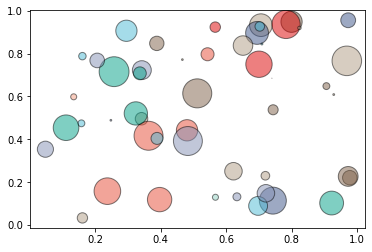

In [93]:
plt.rcParams['scatter.edgecolors'] = 000000

np.random.seed(19680801)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

fig, ax = plt.subplots()
colors = np.random.rand(N)
area = (30 * np.random.rand(N)) ** 2  # 0 to 15 point radii

ax.scatter(x, y, s=area, c=colors, alpha=0.5, cmap=cbm.pal('npg').as_cmap)
plt.show()

# Figure 1

[Text(0.5, 1.0, 'GiniIndex for different cancer type')]

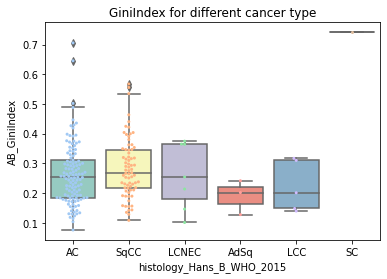

In [95]:
cancerType = sns.boxplot(x='histology_Hans_B_WHO_2015', y='AB_GiniIndex',palette="Set3", data=clinicTable)
cancerType = sns.swarmplot(x='histology_Hans_B_WHO_2015', y='AB_GiniIndex',data=clinicTable, s=3 )
cancerType.set(title='GiniIndex for different cancer type')
#cancerType.get_figure().savefig('/Users/huiyu818/Project/TCR/Analysis/canerTypeGini.eps', dpi=400)

In [124]:
colors = ["#E64B35FF","#4DBBD5FF","#00A087FF","#3C5488FF","#F39B7FFF","#8491b4FF","#91D1C2FF","#DC0000FF", "#7E6148FF", "#B09C85FF"]
sns.set_palette(sns.color_palette(colors))

## Cancer type plot

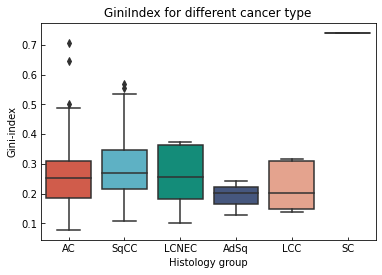

In [125]:
cancerType = sns.boxplot(x='histology_Hans_B_WHO_2015', y='AB_GiniIndex', data=clinicTable)
#cancerType = sns.swarmplot(x='histology_Hans_B_WHO_2015', y='AB_GiniIndex',data=clinicTable, s=3 )
cancerType.set(title='GiniIndex for different cancer type', 
               xlabel='Histology group',
               ylabel='Gini-index'
              )
cancerType.tick_params(direction='in')

'''for patch in cancerType.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
'''

cancerType.get_figure().savefig('/Users/huiyu818/Project/TCR_Summary/Figure1/canerType4.eps', dpi=400)

In [ ]:


fig, ax = plt.subplots()
# colors = 
bplot1 = ax.boxplot(clinicTable,
                   
                   )

In [ ]:
clinicTable = pd.read_excel()